<a href="https://colab.research.google.com/github/MichalWilk45/MichalWilk45/blob/main/NLP_DS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import nltk # Import biblioteki NTLK do analizy tekstu
import spacy # Import biblioteki Spacy do przetwarzania języka naturalnego
import re # Import biblioteki re do wykrywania wzorców w tekście
import pandas as pd # Import biblioteki Pandas do przetwarzania danych
import numpy as np # Import biblioteki Numpy do obliczeń naukowych
import gensim # Import biblioteki Gensim do modelowania tematycznego
from tqdm import tqdm # Import biblioteki tqdm do tworzenia pasków postępu
import seaborn as sns # Import biblioteki Seaborn do wizualizacji danych
import matplotlib.pyplot as plt # Import biblioteki Matplotlib do wizualizacji danych
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # Import biblioteki Scikit-Learn do ekstrakcji cech tekstu
from sklearn.model_selection import train_test_split # Import biblioteki Scikit-Learn do podziału danych na zbiory treningowe i testowe
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix # Import biblioteki Scikit-Learn do oceny jakości modelu
from sklearn.svm import SVC # Import biblioteki Scikit-Learn do klasyfikacji metodą SVM
from sklearn.linear_model import LogisticRegression # Import biblioteki Scikit-Learn do klasyfikacji metodą regresji logistycznej
from sklearn.tree import DecisionTreeClassifier # Import biblioteki Scikit-Learn do klasyfikacji drzewami decyzyjnymi
from sklearn.naive_bayes import MultinomialNB, GaussianNB # Import biblioteki Scikit-Learn do klasyfikacji metodą Naive Bayes
from sklearn.ensemble import RandomForestClassifier # Import biblioteki Scikit-Learn do klasyfikacji metodą lasów losowych
from sklearn.preprocessing import LabelEncoder # Import biblioteki Scikit-Learn do kodowania etykiet kategorii
from wordcloud import WordCloud # Import biblioteki WordCloud do tworzenia chmur słów
from collections import Counter # Import biblioteki collections do zliczania elementów w liście

In [3]:
nlp = spacy.load('en_core_web_sm') #Załadowanie małego językowego modelu Spacy do przetwarzania języka angielskiego.

In [4]:
# Montowanie Google Drive, aby uzyskać dostęp do pliku z danymi
from google.colab import drive
drive.mount('/content/gdrive')

# Importowanie biblioteki Pandas do wczytania pliku CSV z danymi
import pandas as pd

# Ścieżka do pliku CSV z danymi
file_path = '/content/gdrive/MyDrive/IMDB Dataset.csv'

# Wczytanie pliku CSV do obiektu DataFrame
df = pd.read_csv(file_path)

# Wyświetlenie pierwszych pięciu wierszy zbioru danych
df.head(100)

Mounted at /content/gdrive


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
95,Daniel Day-Lewis is the most versatile actor a...,positive
96,My guess would be this was originally going to...,negative
97,"Well, I like to watch bad horror B-Movies, cau...",negative
98,"This IS the worst movie I have ever seen, as w...",negative


In [5]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [6]:
df.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [7]:
# Wyświetlenie kształtu zbioru danych (liczba wierszy i kolumn) 
df.shape

(50000, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [9]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [10]:
# Usunięcie duplikatów z zbioru danych
df.drop_duplicates(inplace=True, subset=None, keep='first')

# Parametr inplace=True oznacza, że ​​zmiany są dokonywane bezpośrednio w obiekcie DataFrame, 
# zamiast tworzenia nowego obiektu. 

# Parametr subset=None oznacza, że wszystkie kolumny są brane pod uwagę przy wyszukiwaniu duplikatów.

# Parametr keep='first' oznacza, że pierwszy wystąpienie każdego zduplikowanego wiersza zostanie zachowane, 
# a pozostałe zostaną usunięte.

In [11]:
df = df.reset_index(drop=True)
df.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


In [12]:
# Sprawdzenie brakujących wartości w zbiorze danych
df.isnull().sum()

# Metoda isnull() zwraca tabelę o tej samej strukturze co oryginalna, 
# w której wartości True oznaczają brakujące wartości.

# Metoda sum() zwraca sumę brakujących wartości w każdej kolumnie.

review       0
sentiment    0
dtype: int64

In [13]:
# Liczenie wystąpień wartości unikalnych w kolumnie 'sentiment'
df['sentiment'].value_counts()

# Metoda value_counts() zwraca liczbę wystąpień każdej wartości unikalnej w kolumnie 'sentiment'. 
# Wynik jest sortowany malejąco według liczby wystąpień.

positive    24884
negative    24698
Name: sentiment, dtype: int64

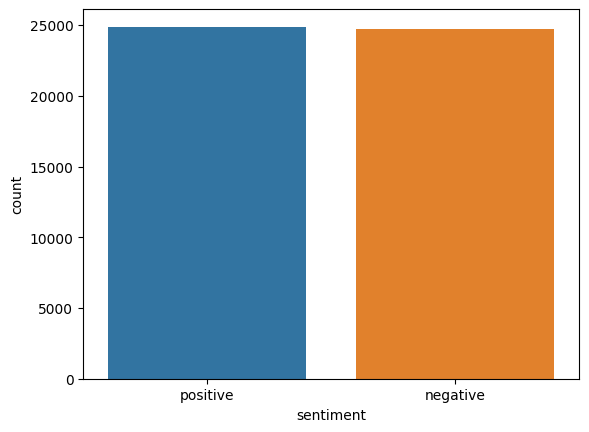

In [14]:
sns.countplot(x='sentiment', data=df)
plt.show()

In [15]:
# Ładowanie słów stop
stop_words = nlp.Defaults.stop_words

In [16]:
# Usuwanie słowa 'not' ze słów stop, ponieważ to słowo ma duży wpływ na sentyment tekstu
nlp.Defaults.stop_words.remove('not')
nlp.vocab['not'].is_stop = False

In [17]:
def preprocess(sentence):
    """
    Przetwarzanie wstępne tekstu za pomocą operacji takich jak usuwanie znaczników HTML, URL-i, 
    usuwanie znaków interpunkcyjnych, zamiana liter na małe litery, usunięcie stop words i lematyzacja.
    """
    # Zamiana wszystkich słów na małe litery
    sentence = sentence.lower()
    
    # Usunięcie znaczników HTML
    sentence = sentence.replace('<br /><br />', ' ')
    
    # Usunięcie URL-i
    sentence = sentence.replace('https://', ' ')
    
    # Usunięcie wszystkich znaków inne niż litery alfabetu
    sentence = re.sub('[^a-zA-Z]',' ',sentence)

    # Usunięcie zbędnych spacji
    sentence = " ".join(sentence.split())
    
    # Usunięcie stop words
    raw = []
    for word in sentence.split():
        if word in stop_words:
            pass
        else:
            raw.append(word)
    sentence = ' '.join(raw)
    
    # Lematyzacja
    sentence = ' '.join([i.lemma_ for i in nlp(sentence)])
    
    return sentence

In [18]:
#Sprawdzenie działania funkcji preprocess na pierwszej opinii z kolumny 'review'
preprocess(df['review'][0])

#Wywołanie funkcji preprocess na pierwszej opinii z kolumny 'review' i sprawdzenie,
#czy operacje przetwarzania tekstu zostały wykonane poprawnie.

'reviewer mention watch oz episode ll hook right exactly happen thing strike oz brutality unflinche scene violence set right word trust not faint hearted timid pull punch regard drug sex violence hardcore classic use word call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inward privacy not high agenda em city home aryan muslims gangstas latinos christians italian irish scuffle death stare dodgy dealing shady agreement far away main appeal fact go show wouldn t dare forget pretty picture paint mainstream audience forget charm forget romance oz doesn t mess episode see strike nasty surreal couldn t ready watch develop taste oz get accustom high level graphic violence not violence injustice crook guard ll sell nickel inmate ll kill order away mannered middle class inmate turn prison bitch lack street skill prison experience watch oz comfortable uncomfortable viewing that s touch darker'

In [19]:
# Przetwarzanie wstępne wszystkich opinii w zbiorze danych
review = [preprocess(text) for text in tqdm(df['review'])]
df['review'] = review
df.head()

100%|██████████| 49582/49582 [16:56<00:00, 48.79it/s]


,review,sentiment
0,reviewer mention watch oz episode ll hook righ...,positive
1,wonderful little production filming technique ...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically s family little boy jake think s zom...,negative
4,petter mattei s love time money visually stunn...,positive


In [20]:
# Wyświetlenie 20 najczęściej używanych słów w opiniach
all_words = [df['review'][i] for i in range(49582)]
all_words = (' '.join(all_words)).split()
most_freq = Counter(all_words).most_common(20)
most_common_20_words = [a for (a,b) in most_freq]
print("The 20 most commonly used words in the reviews are: \n",most_common_20_words)

The 20 most commonly used words in the reviews are: 
 ['s', 'movie', 'film', 't', 'not', 'like', 'good', 'time', 'character', 'watch', 'bad', 'story', 'see', 'think', 'scene', 'great', 'look', 'know', 'end', 'people']


In [21]:
# wszystkie słowa używane w pozytywnych recenzjach
df_pos = df[df['sentiment']=='positive'].reset_index()
all_positive_words = [df_pos['review'][i] for i in range(24884)]
all_positive_words = ' '.join(all_positive_words)

# wszystkie słowa używane w negatywnych recenzjach
df_neg = df[df['sentiment']=='negative'].reset_index()
all_negative_words = [df_neg['review'][i] for i in range(24698)]
all_negative_words = ' '.join(all_negative_words)

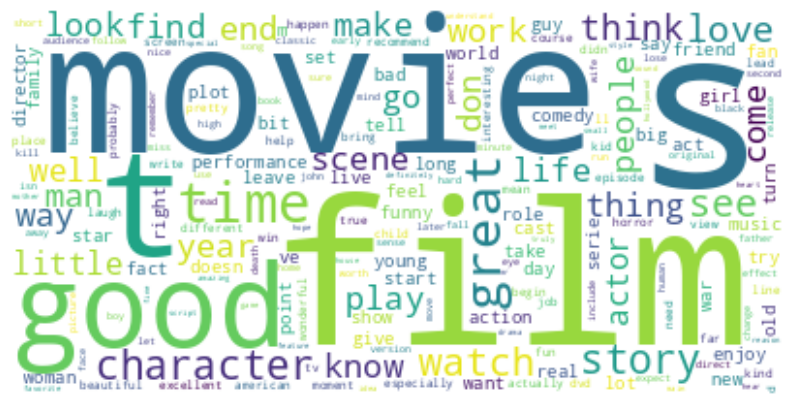

In [22]:
# Wizualizacja słów używanych w pozytywnych recenzjach
plt.figure(figsize=(10,8))

# Generowanie chmury słów z łańcucha znaków zawierającego wszystkie słowa używane w pozytywnych recenzjach
word_cloud1 = WordCloud(collocations=False, background_color='white').generate(all_positive_words)

# Wyświetlenie chmury słów za pomocą metody imshow z biblioteki matplotlib
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

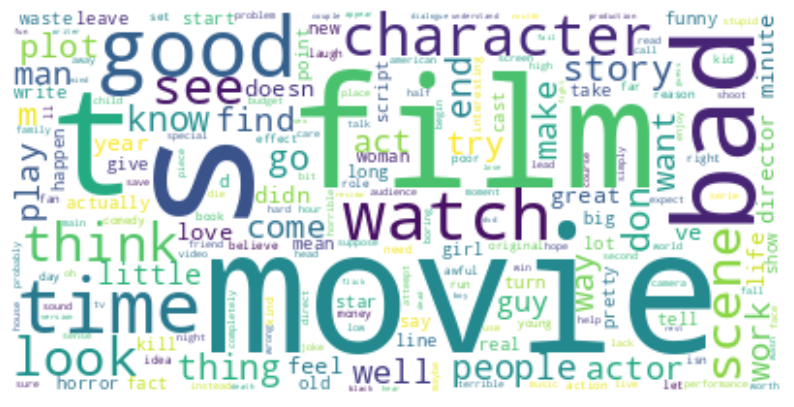

In [23]:
# Wizualizacja słów używanych w negatywnych recenzjach
plt.figure(figsize=(10,8))

# Generowanie chmury słów z łańcucha znaków zawierającego wszystkie słowa używane w negatywnych recenzjach
word_cloud2 = WordCloud(collocations=False, background_color='white').generate(all_negative_words)

# Wyświetlenie chmury słów za pomocą metody imshow z biblioteki matplotlib
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
# Tokenizacja tekstów opinii i tworzenie korpusu
corpus = []
for doc in tqdm(df['review']):
    # Używanie biblioteki spaCy do tokenizacji tekstu opinii
    words = [token.text for token in nlp(doc)]
    # Dodawanie listy tokenów do korpusu
    corpus.append(words)

100%|██████████| 49582/49582 [17:22<00:00, 47.54it/s]


In [25]:
# Pierwsze trzy recenzje z korpusu
corpus[:3]

[['reviewer',
  'mention',
  'watch',
  'oz',
  'episode',
  'll',
  'hook',
  'right',
  'exactly',
  'happen',
  'thing',
  'strike',
  'oz',
  'brutality',
  'unflinche',
  'scene',
  'violence',
  'set',
  'right',
  'word',
  'trust',
  'not',
  'faint',
  'hearted',
  'timid',
  'pull',
  'punch',
  'regard',
  'drug',
  'sex',
  'violence',
  'hardcore',
  'classic',
  'use',
  'word',
  'call',
  'oz',
  'nickname',
  'give',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary',
  'focus',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cell',
  'glass',
  'front',
  'face',
  'inward',
  'privacy',
  'not',
  'high',
  'agenda',
  'em',
  'city',
  'home',
  'aryan',
  'muslims',
  'gangstas',
  'latinos',
  'christians',
  'italian',
  'irish',
  'scuffle',
  'death',
  'stare',
  'dodgy',
  'dealing',
  'shady',
  'agreement',
  'far',
  'away',
  'main',
  'appeal',
  'fact',
  'go',
  'show',
  'wouldn',
  't',
  'dare',
  'for